# 4. Creating and Visualizing DataFrames
Learn to visualize the contents of your DataFrames, handle missing data values, and import data from and export data to CSV files.

# Which avocado size is most popular?

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

pandas has been imported as pd, and avocados is available.

# Instructions:

- Print the head of the avocados dataset. What columns are available?
- For each avocado size group, calculate the total number sold, storing as nb_sold_by_size.
- Create a bar plot of the number of avocados sold by size.
- Show the plot.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


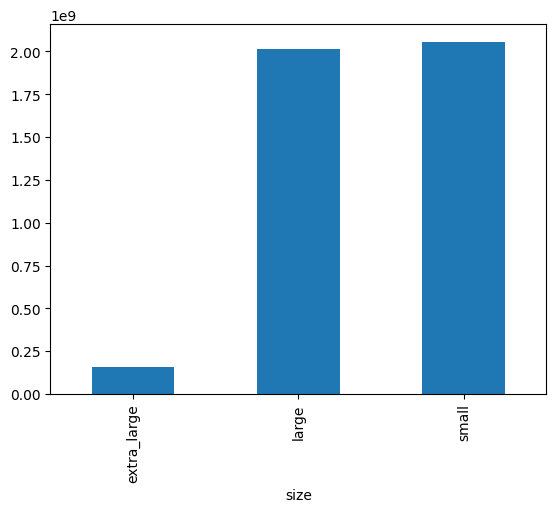

In [4]:
import pandas as pd
import urllib.request
import pickle

avocados = pd.read_pickle("avoplotto.pkl")

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

# Changes in sales over time

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

pandas has been imported as pd, and avocados is available.

# Instructions:

- Get the total number of avocados sold on each date. The DataFrame has two rows for each date—one for organic, and one for conventional. Save this as nb_sold_by_date.
- Create a line plot of the number of avocados sold.
- Show the plot.

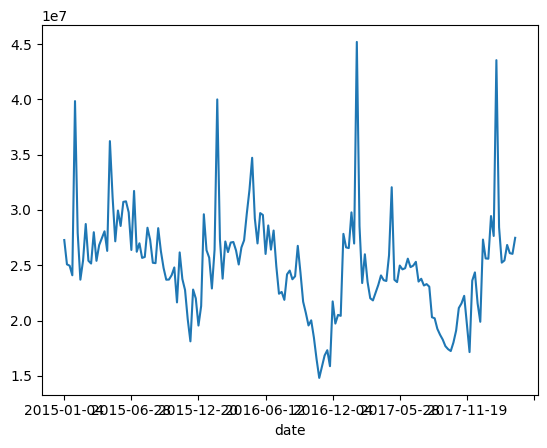

In [5]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

# Avocado supply and demand

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

matplotlib.pyplot has been imported as plt, pandas has been imported as pd, and avocados is available.

# Instructions:

- Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis. Title it "Number of avocados sold vs. average price".
- Show the plot.

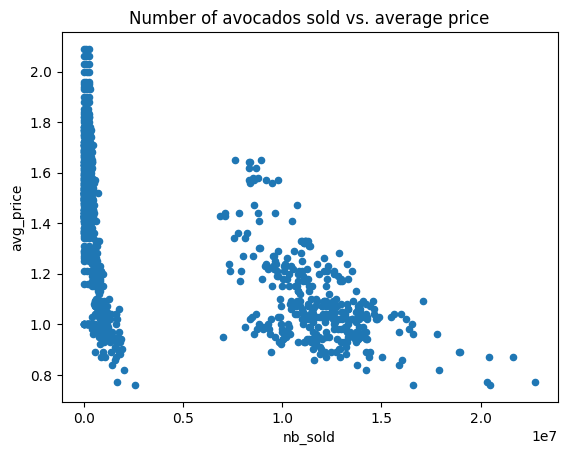

In [6]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

# Price of conventional vs. organic avocados

Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

matplotlib.pyplot has been imported as plt and pandas has been imported as pd.

# Instruction:

- Subset avocados for the conventional type, and the average price column. Create a histogram.
- Create a histogram of avg_price for organic type avocados.
- Add a legend to your plot, with the names "conventional" and "organic".
- Show your plot.

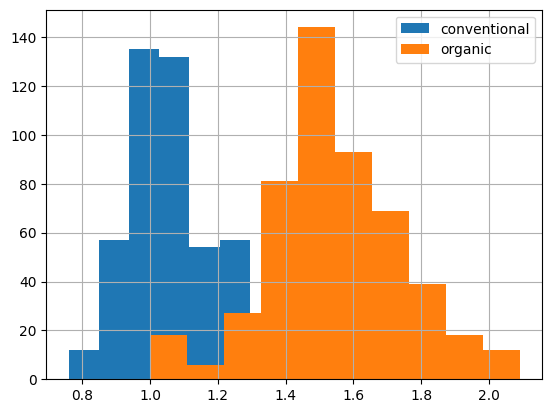

In [7]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

- Modify your code to adjust the transparency of both histograms to 0.5 to see how much overlap there is between the two distributions.

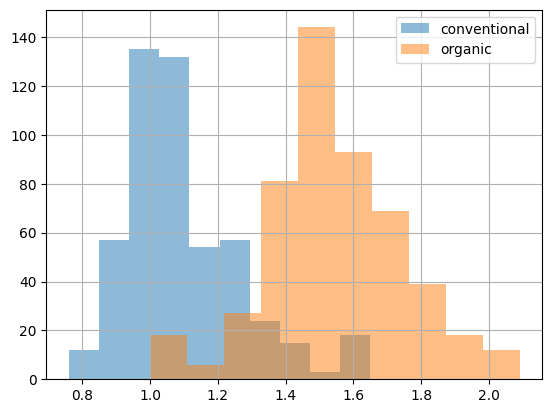

In [8]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha = 0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha = 0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

- Modify your code to use 20 bins in both histograms.

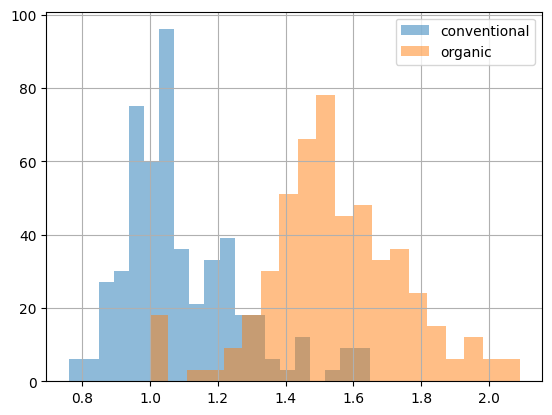

In [9]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins = 20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins = 20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# Finding missing values

Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

pandas has been imported as pd and avocados_2016, a subset of avocados that contains only sales from 2016, is available.

# Instructions:

- Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
- Print a summary that shows whether any value in each column is missing or not.
- Create a bar plot of the total number of missing values in each column.

    date  avg_price  total_sold  small_sold  large_sold    xl_sold  total_bags_sold  small_bags_sold  large_bags_sold  xl_bags_sold
0                                               False                                                                              
1                                               False                                                                              
2                                               False                                                                              
3                                               False                                                                              
4                                               False                                                                              
5                                               False                                                                              
6                                               False                       

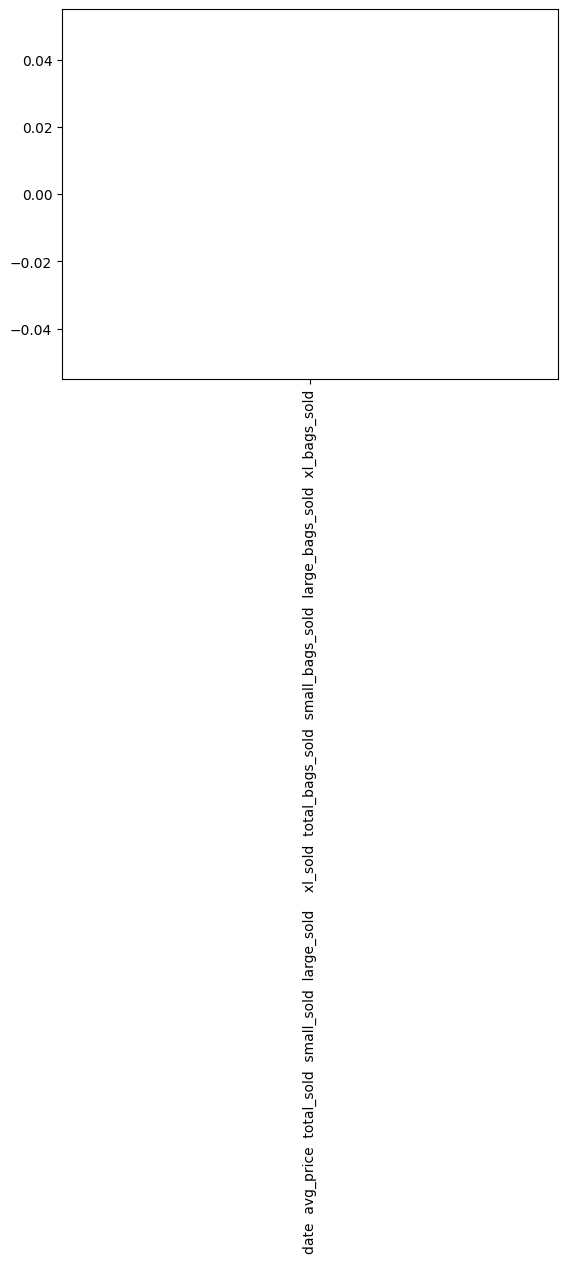

In [28]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()


# Removing missing values

Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

pandas has been imported as pd and avocados_2016 is available.

# Instructions:

- Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.
- Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.

In [37]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


# Replacing missing values

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

dogs[["height_cm", "weight_kg"]].hist()
pandas has been imported as pd and matplotlib.pyplot has been imported as plt. The avocados_2016 dataset is available.

# Instructions:

- A list has been created, cols_with_missing, containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold".
- Create a histogram of those columns.
- Show the plot.

In [38]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind="hist")

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

KeyError: "None of [Index(['small_sold', 'large_sold', 'xl_sold'], dtype='object')] are in the [columns]"

- Replace the missing values of avocados_2016 with 0s and store the result as avocados_filled.
- Create a histogram of the cols_with_missing columns of avocados_filled.

In [ ]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].plot(kind="hist")

# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

date	small_sold	large_sold
"2019-11-03"	10376832	7835071
"2019-11-10"	10717154	8561348
pandas as pd is imported.

Instructions:
- Create a list of dictionaries with the new data called avocados_list.
- Convert the list into a DataFrame called avocados_2019.
- Print your new DataFrame.

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

date	small_sold	large_sold
"2019-11-17"	10859987	7674135
"2019-12-01"	9291631	6238096
pandas as pd is imported.

Instructions:
- Create a dictionary of lists with the new data called avocados_dict.
- Convert the dictionary to a DataFrame called avocados_2019.
Print your new DataFrame.

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (airline_bumping.csv) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

pandas is imported for you as pd. "airline_bumping.csv" is in your working directory.

Instructions:
- Read the CSV file "airline_bumping.csv" and store it as a DataFrame called airline_bumping.
- Print the first few rows of airline_bumping.

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

- For each airline group, select the nb_bumped, and total_passengers columns, and calculate the sum (for both years). Store this as airline_totals.

In [ ]:
# From previous step
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped","total_passengers"]].sum()

- Create a new column of airline_totals called bumps_per_10k, which is the number of passengers bumped per 10,000 passengers in 2016 and 2017.

In [ ]:
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

- Print airline_totals to see the results of your manipulations.

In [ ]:
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

pandas as pd has been imported for you.

Instructions:
- Sort airline_totals by the values of bumps_per_10k from highest to lowest, storing as airline_totals_sorted.
- Print your sorted DataFrame.
- Save the sorted DataFrame as a CSV called "airline_totals_sorted.csv".

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")